In [1395]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix


In [1396]:
data_frame = pd.read_csv("Drinking_water.csv")
data_frame = data_frame.iloc[:,1:11]

In [1397]:
data_frame = data_frame.dropna()

In [1398]:
data_frame

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [1399]:
x_features = data_frame.iloc[:,:-1]
y_potability = data_frame.iloc[:,-1]

In [1400]:
x_train , x_test , y_train , y_test = train_test_split(x_features,y_potability,test_size=0.1,random_state=33)

<Axes: >

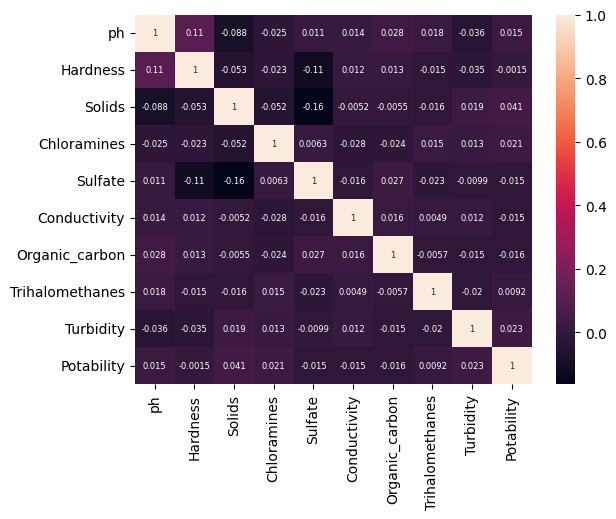

In [1401]:
sns.heatmap(data_frame.corr(),annot=True,annot_kws={"size": 6})

In [ ]:
dt1 = data_frame[data_frame["Potability"] == 1]
dt0 = data_frame[data_frame["Potability"] == 0]
sns.pairplot(dt0.head(100),hue="Potability",plot_kws=dict(alpha=0.2))
sns.pairplot(dt1.head(100),hue="Potability",plot_kws={'color':'red','alpha' : 0.2})

In [1403]:
from sklearn.preprocessing import StandardScaler , RobustScaler


scaler0 = StandardScaler().fit(x_train)

In [1404]:
x_train = scaler0.transform(x_train)
x_test = scaler0.transform(x_test)

scaler1 = RobustScaler().fit(x_train)

x_train = scaler1.transform(x_train)
x_test = scaler1.transform(x_test)

In [1405]:
x_train.shape

(1809, 9)

In [1406]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC

pca = PCA(n_components = 5).fit(x_train)

x_train = pca.transform(x_train)
x_test = pca.transform(x_test)
cls = SVC(kernel='rbf', random_state = 31)
cls.fit(x_train, y_train)
y_pred = cls.predict(x_test)

cf_matrix0 = confusion_matrix(y_train,cls.predict(x_train))
cf_matrix1 = confusion_matrix(y_test,y_pred) 

<Axes: >

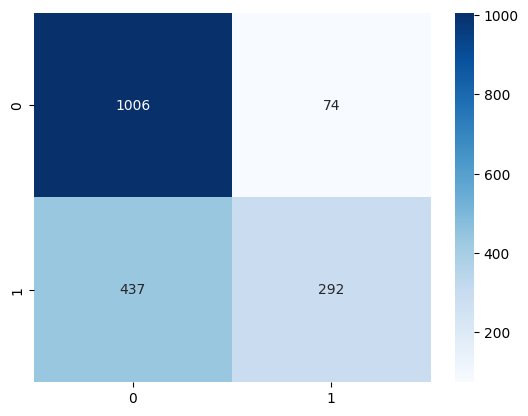

In [1407]:
sns.heatmap(cf_matrix0, annot=True, cmap='Blues',fmt='g')

<Axes: >

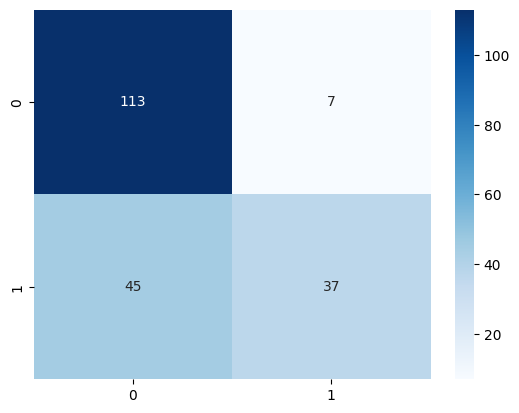

In [1408]:
sns.heatmap(cf_matrix1, annot=True, cmap='Blues',fmt='g')

In [1409]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,cls.predict(x_train))

0.7175234936428966

In [1410]:
accuracy_score(y_test,cls.predict(x_test))

0.7425742574257426